AttributeError: 'MultilayerNetwork' object has no attribute 'get_layer'

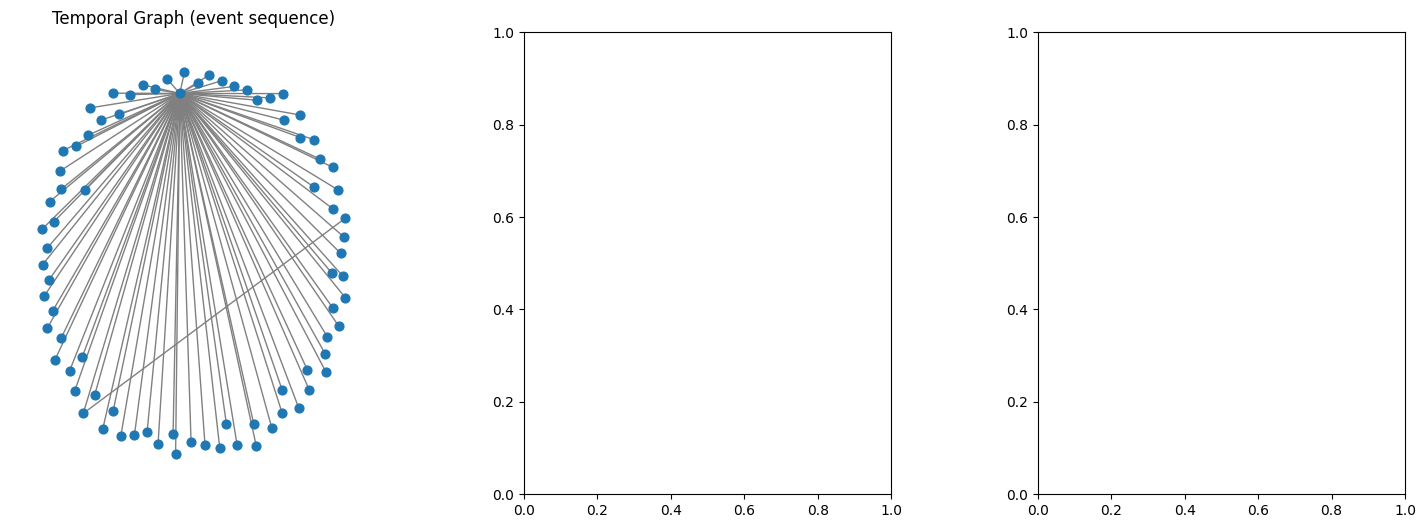

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import hypernetx as hnx
import pymnet

# Load graphs from your provided pickle files
with open("/home/mustang/Documents/GitHub/NS_Project/streamlit_artifacts/static_graph.pkl", "rb") as f:
    G_static = pickle.load(f)

with open("//home/mustang/Documents/GitHub/NS_Project/streamlit_artifacts/multiplex_graph.pkl", "rb") as f:
    G_multi = pickle.load(f)

with open("/home/mustang/Documents/GitHub/NS_Project/streamlit_artifacts/hypergraph.pkl", "rb") as f:
    H_hyper = pickle.load(f)

# Set up matplotlib figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.4)

# Plot 1: Static Graph (as approximation for temporal)
pos = nx.spring_layout(G_static)
nx.draw(G_static, pos, ax=axes[0], node_size=40, edge_color='gray')
axes[0].set_title("Temporal Graph (event sequence)")

# Plot 2: Multiplex Graph
G_layer = G_multi.get_layer("communications")
pos_layer = nx.spring_layout(nx.Graph(G_layer))
nx.draw(G_layer, pos_layer, ax=axes[1], node_size=40, edge_color='blue')
axes[1].set_title("Multiplex Layer: Communications")

# Plot 3: Hypergraph
hnx.draw(H_hyper, ax=axes[2])
axes[2].set_title("Hypergraph (Group Meetings)")

# Save and show
plt.tight_layout()
plt.savefig("/home/mustang/Documents/GitHub/NS_Project/network_models_comparison.png")
plt.show()
